## Customer Churn Predication

## About Dataset

**_link_** : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Each row represents a customer, each column contains customer’s attributes described on the column.

### Columns :

1) CustomerID : ID of the customer
2) gender : Whether the customer is a male or a female
3) SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
4) Partner : Whether the customer has a partner or not (Yes, No)
5) Dependents : Whether the customer has dependents or not (Yes, No)
6) tenure : Number of months the customer has stayed with the company
7) PhoneService : Whether the customer has a phone service or not (Yes, No)
8) MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
9) InternetService  : Customer’s internet service provider (DSL, Fiber optic, No)
10) OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
11) OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
12) DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)

13) TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
14) StreamingTv: Whether the customer has streaming TV or not (Yes, No, No internet service)
15) StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
16) Contract :  The contract term of the customer (Month-to-month, One year, Two year)
17) PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
18) PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card
19) MonthlyCharges : The amount charged to the customer monthly
20) TotalCharges : The total amount charged to the customer since they joined as a customer
21) Churn :  Whether the customer churned or not (Yes or No)


## Data Wrangling

In [5]:
from locale import normalize

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total Charges is a object type which is wrong, convert it to float


In [7]:
df["TotalCharges"] = df["TotalCharges"].str.strip()
df["TotalCharges"] = df["TotalCharges"].replace("", np.nan)

df["TotalCharges"] = df["TotalCharges"].astype(float)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total Charges have 11 missing values that arw very low. We can simply drop this but before this lets see the dist.
of data for dependent variable

In [9]:
data_dist = df.groupby("Churn").size().reset_index(name = "total")

data_dist["perc"] =  round(data_dist["total"]*100/data_dist["total"].sum(),2)
data_dist

,Churn,total,perc
0,No,5174,73.46
1,Yes,1869,26.54


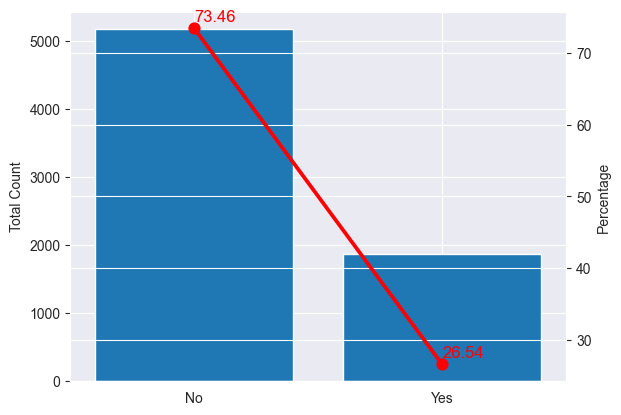

In [10]:
fig, ax1 = plt.subplots()
ax1.bar(data_dist["Churn"], data_dist["total"])
ax1.set_ylabel("Total Count")

# secondary axis
ax2 = ax1.twinx()
sns.pointplot(data=data_dist, x="Churn", y="perc", ax=ax2, color="red", marker="o")
ax2.set_ylabel("Percentage")

# Add labels to bar plot
for i, j in zip(data_dist["Churn"], data_dist["perc"]):
    ax2.text(i, j+1, str(j), color = "red", size = 12)

plt.show()



As we can see data is highly imbalance. IT has only 26.54% of data which has churned users. This class is very important for us as we are predicating churn.

Imbalance data leads the model to inclined towards majority class  and whenever model get confused it will predict the majority class and we will get high accuracy(false) too on our test data because there are very less values of majority class.


We will see it later, how we can tackle this

As of now we need to check if missing values belongs to churn class. if yes we should fill these values instead of simply droping


In [11]:
df[df["TotalCharges"].isnull()]["Churn"].value_counts()


Churn
No    11
Name: count, dtype: int64

All values belong to non churned class so we can simply drop these records

In [12]:
df.dropna(subset = "TotalCharges" , inplace = True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Now lets check if there is any outlier in our numerical columns, most models are prone to outliers

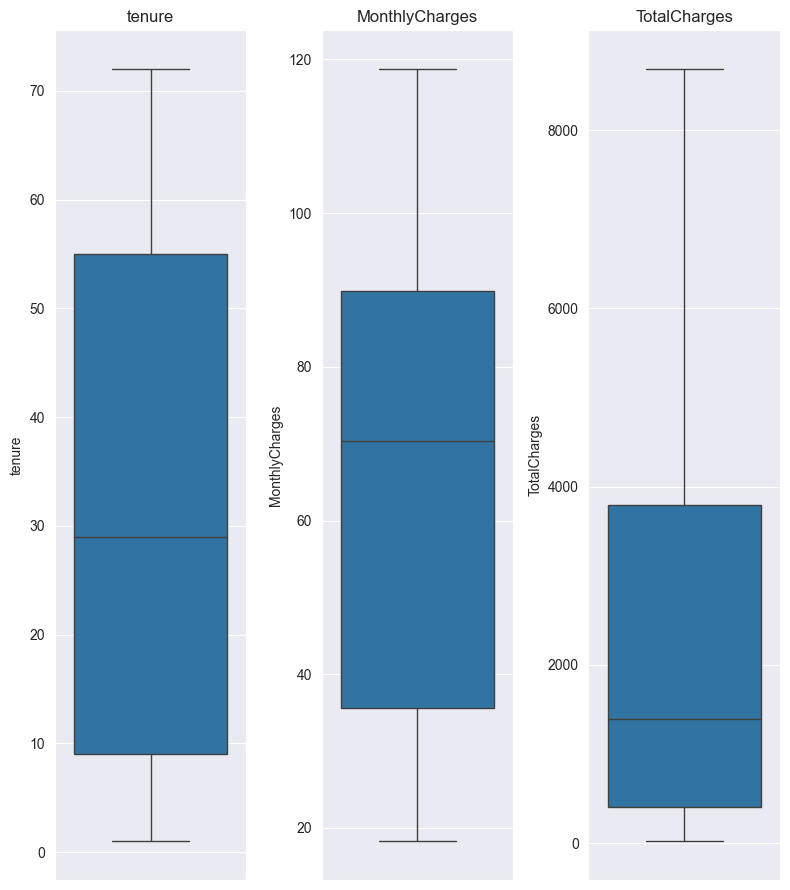

In [15]:
cols = ["tenure","MonthlyCharges","TotalCharges"]
fig, axes = plt.subplots(ncols=len(cols), figsize=(8, 3*len(cols)))

for i, col in enumerate(cols):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


There are no outliers in any numerical column

In [16]:
df.drop(columns = ["customerID"], inplace = True)

## EDA ( Exploratory Data Analysis)

<Axes: >

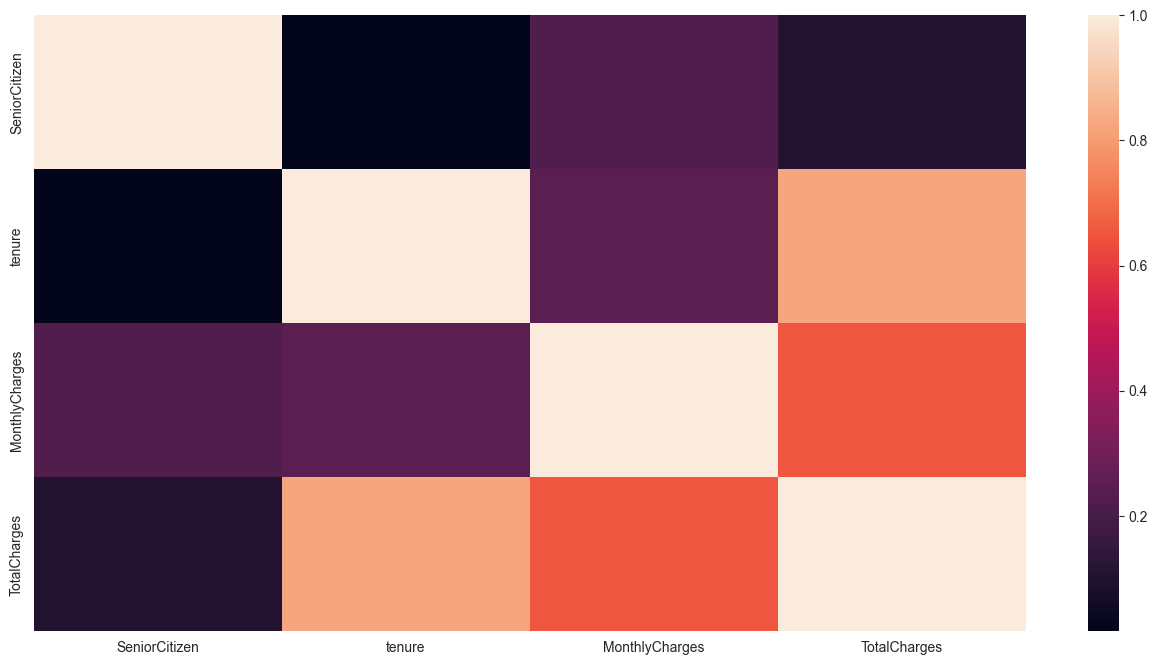

In [17]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.to_list()
numerical_cols = numerical_cols
df[numerical_cols].corr()
plt.figure(figsize = (16,8))
sns.heatmap(df[numerical_cols].corr())

As expected Tenure and Total Charges are highly correlated. This is known as  multicollinearity

To deal with it we have to remove one out of these two because multicollinearity can make it difficult to interpret the individual effect of each variable on the dependent variable.

In [18]:
df.drop(columns = ["TotalCharges"], inplace = True)

The columns which depend on Internet Service or Phone service like online security.

These have values like Yes, No, No Internet Service. This is actually wrong. It is again multicollinearity.

No Internet Service, This information is actually redundant.

In [19]:
for i in df.columns:
    if "No internet service" in df[i].unique():
        df[i] = df[i].str.replace("No internet service","No")

for i in df.columns:
    if "No phone service" in df[i].unique():
        df[i] = df[i].str.replace("No phone service","No")

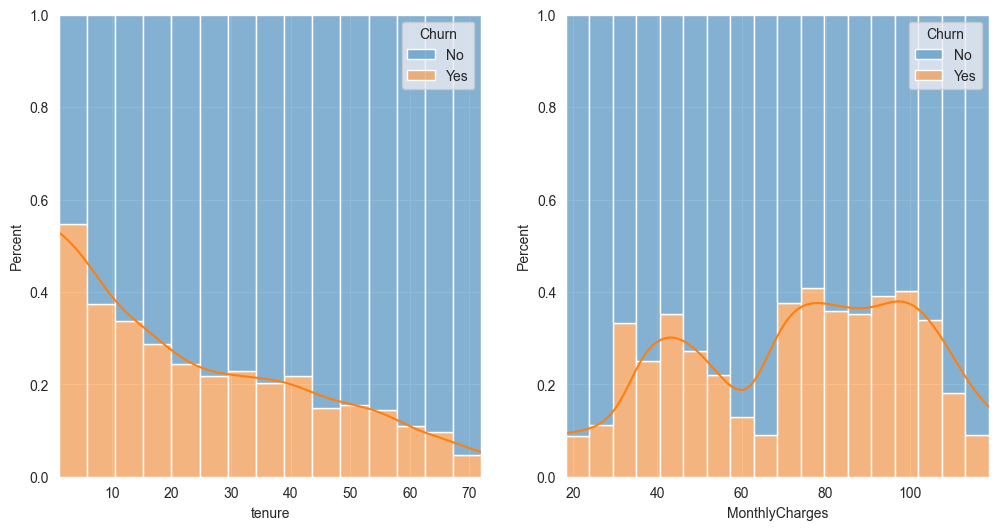

In [20]:
numerical_cols = ["tenure", "MonthlyCharges"]
fig, ax = plt.subplots(ncols = 2, figsize = (12,6))
for i,j in enumerate(numerical_cols):
    sns.histplot(data = df , x = j, hue = "Churn" , ax = ax[i], stat = "percent", multiple = "fill", kd
    e = True)


A large fraction of customers with tenure less than 5 months belong to the churn category, indicating high early churn risk.

Overall, the probability of churn decreases as tenure increases — customers who stay longer are more likely to remain with the company.

low monthly charge < 30 have very low churn rate.

also there is a sweet spot 60 tp 70 where there is very low churn rate.

70 to 110 is high churn category



**Now we will see how other independent variables are related to dependent using contegency tables and plots**

In [21]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

len(cat_cols)

16

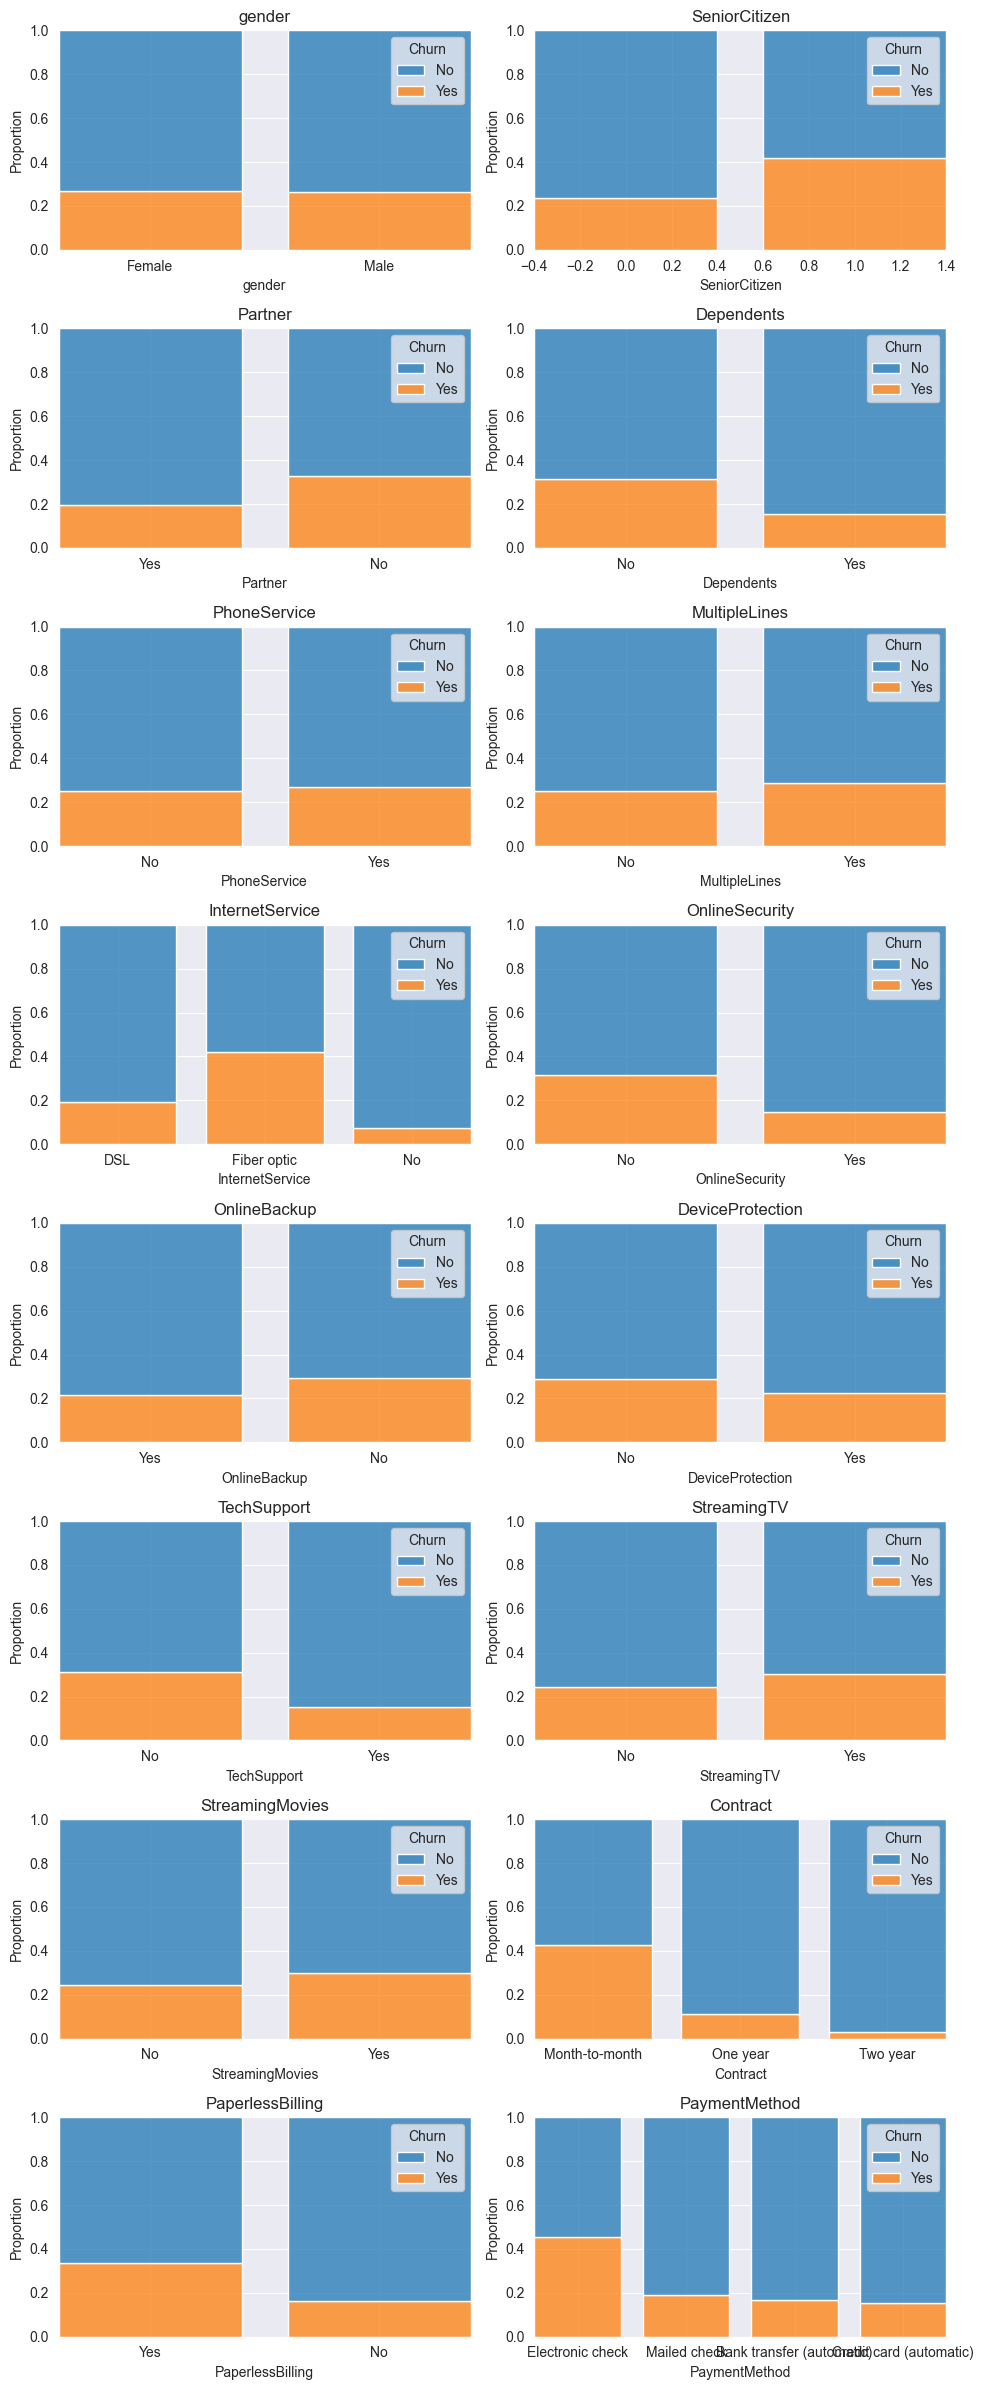

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(10,24))
ax = ax.flatten()

for i, col in enumerate(cat_cols):
    # normalize counts to percentages
    g = sns.histplot(
        data=df, x=col, hue="Churn",
        multiple="fill",   # makes stacked bar 100% height
        shrink=0.8,
        ax=ax[i],
        discrete=True,
        stat="percent",
    )
    ax[i].set_ylabel("Proportion")
    ax[i].set_title(col)

plt.tight_layout()
plt.show()


Demographics:

* Senior citizens → higher churn
* Non-partners → higher churn
* Non-dependents → higher churn

Service-related:

* Fiber optic internet → higher churn
* No online security → higher churn
* No tech support → higher churn
* Monthly contracts → higher churn
* Paperless billing → higher churn
* Electronic checks → higher churn

In [23]:
label_encode_cols = ['Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling']


for i in label_encode_cols:
    df[i] = np.where(df[i] == "Yes", 1,0)


## Paperless billling have higher churn, lets verify this

In [24]:
df["PaperlessBilling"].value_counts()


PaperlessBilling
1    4168
0    2864
Name: count, dtype: int64

Paperless billing have 62% monthly users while non paperless have 45%.

But to make sure paperless billing have no impact on churn we can find churn rate for paperless and non paperless customers using only monthly contract customers. IF bill type has no impact their churn rate for monthly users will be same

In [25]:
import pandas as pd
pd.crosstab(
    index=[df["PaperlessBilling"], df["Contract"]],
    columns=df["Churn"],
    normalize="index"
).unstack()

Churn                        No                                Yes            \
Contract         Month-to-month  One year  Two year Month-to-month  One year   
PaperlessBilling                                                               
0                      0.685027  0.928678  0.983370       0.314973  0.071322   
1                      0.517015  0.852315  0.957854       0.482985  0.147685   

Churn                       
Contract          Two year  
PaperlessBilling            
0                 0.016630  
1                 0.042146

From above table we can say there is affect of Billing Type and there is interaction affect too

## Model Building

In [26]:
df["gender"] = np.where(df["gender"] == "Male", 1,0)
df["Churn"] = np.where(df["Churn"] == "Yes", 1,0)

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1] ,test_size = 0.2, random_state = 42)

In [29]:
cat_cols = ["Contract", "InternetService", "PaymentMethod"]
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[cat_cols])
X_test_encoded = encoder.transform(X_test[cat_cols])
X_train_num = X_train.drop(columns=cat_cols)
X_test_num = X_test.drop(columns=cat_cols)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)


X_train_final = pd.DataFrame(
    np.concatenate([X_train_scaled, X_train_encoded], axis=1),
    columns=list(X_train_num.columns) + list(encoder.get_feature_names_out(cat_cols))
)

# Final test set
X_test_final = pd.DataFrame(
    np.concatenate([X_test_scaled, X_test_encoded], axis=1),
    columns=list(X_test_num.columns) + list(encoder.get_feature_names_out(cat_cols))
)





In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


dt = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight = "balanced")
dt.fit(X_train_final, y_train)
y_pred = dt.predict(X_test_final)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Accuracy: 0.744136460554371


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.51      0.76      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.76      1407



for churn -  recall is 76%

precision = means out of total positive results, how much is actually positive

recall -  means out of total actual  how much i managed to predict)

In [33]:
import pickle
with open("churn_model.pkl", "wb") as f:
    pickle.dump(dt, f)